# Classification with Regularization

Overfiting is a major problem in Mmachine Learning model.<br>
When a model suffers from overfiting, while it performs very well at mapping the training dataset, it performs poorly in making generalization about unseen data. 

Objectives:
- Show how regularization can be used to fight overfiting.
- Use neural networks for classification.
    - Train a neural network with no regularization.
    - Train a neural network with regularization.

In [1]:
import numpy as np
import neural_networks
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

### Data to Classify

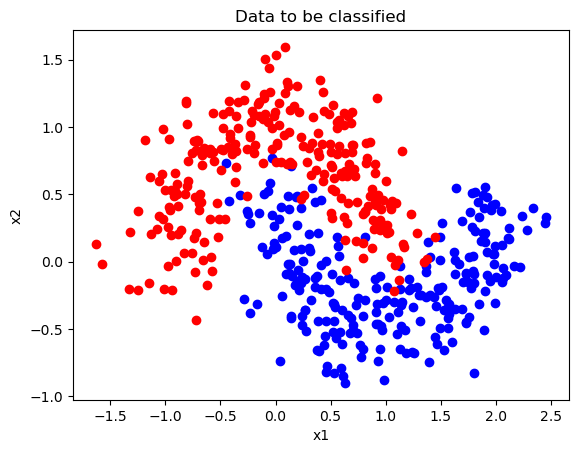

In [5]:
#Data:
# Create a datapoints using skilearn make_moons function
x, y = make_moons(n_samples=500, shuffle=True, noise=.22)

# Create a scatter plot with a red dashed line
plt.scatter(x[y==1][:,0], x[y==1][:,1], color='blue', marker='o')
plt.scatter(x[y==0][:,0], x[y==0][:,1], color='red', marker='o')
# Add labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data to be classified')
plt.show()

Split data into training/Testting dataset

In [6]:
x = x.T
y = y.reshape((1,-1))

x_train = x[:,0:450]
y_train = y[:,0:450]

x_test = x[:,450:]
y_test = y[:,450:]

## Set Neural Network to for binary classification 

### 01- Neural Network with no Regularization

In [33]:
# Create Hidden Layers:

l1 = neural_networks.NN_Layer(layer='l1', units=50, activation_func='relu')  # Neural network layer with 18 units and reLu activation function.
l2 = neural_networks.NN_Layer(layer='l2', units=120, activation_func='relu')
l3 = neural_networks.NN_Layer(layer='l3', units=1, activation_func='sigmoid')

In [37]:
# Create Model:
model = neural_networks.NN(hidden_layers=[l1,l2,l3,])

# Train Model:
model.train(
    features=x_train,       # X vector, features 
    labels=y_train,         # Y vector, labels
    alpha=0.4,              # Learning rate
    n_iterations=2000,      # Number of iterations optimizing
    l2_regularization=False,# No regularization applied
    e=1e-10)                

0.487803921767215
0.08636314705666367
0.048676217820296956
0.03950192904134172
0.036240708663433964
0.03450293229038432
0.03347027022915505
0.03272829566293188
0.03219136510706643
0.031767850895729303
0.03139122741990019
0.031126106496906548
0.031141525995690703
0.030894020255757517
0.030695784577296596
0.03056002115778676
0.030407517131873472
0.03011771445320027
0.030011784829757505
0.029666137230893543


In [38]:
# Evaluate Performance of the model on test set:

# Model Prediction on the testing data:
y_hat = model.predict(x_test)

# Calculate Accuracy of the model:
print(f'Model Accuracy: {1- np.sum(np.power(np.where(y_hat>=0.5, 1, 0) - y_test, 2))/(y_test.shape[1])}')

Model Accuracy: 0.92


Plot model results - Decision Boundary 

In [42]:
#- Generate points to form the decision boundary:
x1_min, x1_max = x[0,:].min(), x[0,:].max() 
x2_min, x2_max = x[1,:].min(), x[1,:].max()
x1, x2= np.meshgrid(np.linspace(x1_min, x1_max, 1000),
                    np.linspace(x2_min, x2_max, 1000))
x_grid = np.c_[x1.ravel(), x2.ravel()].T

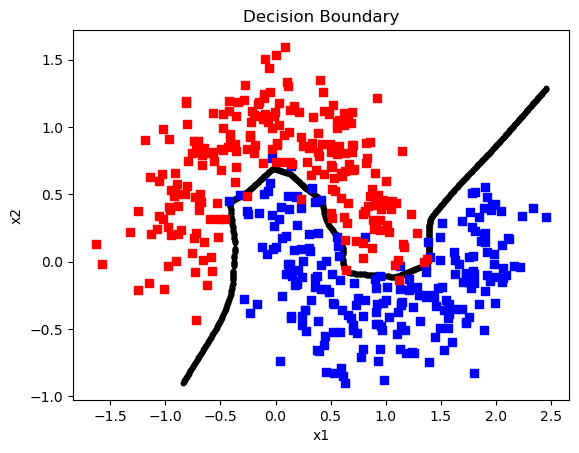

In [43]:
#- Predict usinging the trained model:
y_hat_grid = model.predict(x_grid)


#- Plot results:
plt.scatter(x_grid[:,np.logical_and(y_hat_grid >= 0.49, y_hat_grid <= 0.51).reshape(-1)][0,:], 
            x_grid[:,np.logical_and(y_hat_grid >= 0.49, y_hat_grid <= 0.51).reshape(-1)][1,:], color='black', marker='.')
plt.scatter(x_train[:,(y_train == 1).reshape(-1)][0,:], 
            x_train[:,(y_train == 1).reshape(-1)][1,:], color='blue', marker='s')
plt.scatter(x_train[:,(y_train == 0).reshape(-1)][0,:], 
            x_train[:,(y_train == 0).reshape(-1)][1,:], color='red', marker='s')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary')
plt.show()

The decision boundary above contains relative high variance, this is due to overfiting on the training dataset.<br>
A simple decision boundary, which is better to make generalizations, can be achieved with regularization.

### 02- Neural Network with Regularization

In [48]:
# Hidden Layers:
l_1 = neural_networks.NN_Layer(layer='l1', units=50, activation_func='relu')  # Neural network layer with 18 units and reLu activation function.
l_2 = neural_networks.NN_Layer(layer='l2', units=120, activation_func='relu')
l_3 = neural_networks.NN_Layer(layer='l3', units=1, activation_func='sigmoid')


# Create Model:
model_with_reg = neural_networks.NN(hidden_layers=[l_1,l_2,l_3,])

# Train Model:
model_with_reg.train(
    features=x_train,       # vector X
    labels=y_train,         # Labels
    alpha=0.4,              # Learning rate 
    n_iterations=2000,      # number of iterations
    l2_regularization=True, # Use regularization
    lambd=0.4,              # Penalty to be used in the regularization
    e=1e-10)

0.43106325208456087
0.23751496675089234
0.1984412458596288
0.177129902588686
0.1659934250501283
0.15779516639283317
0.15080407667425255
0.14448686645571415
0.13862014768714043
0.13323735016667415
0.12823585929840323
0.12360196576635879
0.11927165754395269
0.11528708458165965
0.11162911203600706
0.1082276928666174
0.10506987118033284
0.10212483959898351
0.0993762270179453
0.09685914387887591


In [49]:
# Evaluate Performance of the model on test set:

# Model Prediction on the testing data:
y_hat = model_with_reg.predict(x_test)

# Calculate Accuracy of the model:
print(f'Model Accuracy with Regularization: {1- np.sum(np.power(np.where(y_hat>=0.5, 1, 0) - y_test, 2))/(y_test.shape[1])}')

Model Accuracy with Regularization: 0.92


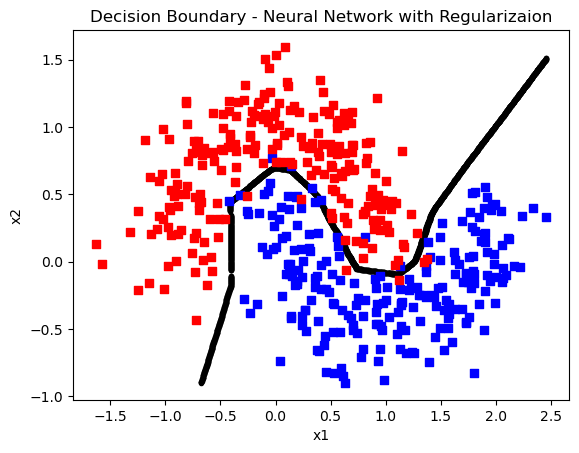

In [50]:
#- Predict usinging the trained model:
y_hat_grid_w_reg = model_with_reg.predict(x_grid)


#- Plot results:
plt.scatter(x_grid[:,np.logical_and(y_hat_grid_w_reg >= 0.49, y_hat_grid_w_reg <= 0.51).reshape(-1)][0,:], 
            x_grid[:,np.logical_and(y_hat_grid_w_reg >= 0.49, y_hat_grid_w_reg <= 0.51).reshape(-1)][1,:], color='black', marker='.')

plt.scatter(x_train[:,(y_train == 1).reshape(-1)][0,:], 
            x_train[:,(y_train == 1).reshape(-1)][1,:], color='blue', marker='s')
plt.scatter(x_train[:,(y_train == 0).reshape(-1)][0,:], 
            x_train[:,(y_train == 0).reshape(-1)][1,:], color='red', marker='s')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary - Neural Network with Regularizaion')
plt.show()

Plot Both Decision Boundary

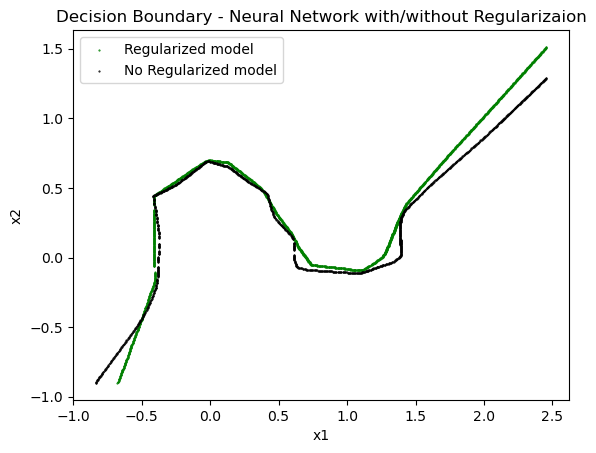

In [60]:

plt.scatter(x_grid[:,np.logical_and(y_hat_grid_w_reg >= 0.49, y_hat_grid_w_reg <= 0.51).reshape(-1)][0,:], 
            x_grid[:,np.logical_and(y_hat_grid_w_reg >= 0.49, y_hat_grid_w_reg <= 0.51).reshape(-1)][1,:], color='green', marker='.', label='Regularized model', s=1)

plt.scatter(x_grid[:,np.logical_and(y_hat_grid >= 0.49, y_hat_grid <= 0.51).reshape(-1)][0,:], 
            x_grid[:,np.logical_and(y_hat_grid >= 0.49, y_hat_grid <= 0.51).reshape(-1)][1,:], color='black', marker='.', label='No Regularized model', s=1)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary - Neural Network with/without Regularizaion')
plt.legend()
plt.show()

Adding regularization penalty, helps to prevent the model from overfitting the training data.

Author:<br>
Emerson Goncalves